## IPL 2022 Capstone Project
The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

column names: Variable Type

date : string  
venue : string  
stage : string  
team1 : string    
team2 : string  
toss_winner : string  
toss_decision : string  
first_ings_score : integer   
second_ings_score : integer  
match_winner : string   
won_by : string  
margin : integer     
player_of_the_match : string  
top_scorer : string   
highscore : integer   
best_bowling : string     
best_bowling_fgure : string   
gure : string   

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

df = pd.read_csv( 'IPL.csv')

df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

### Now let's see how many columns have null values in total.

In [50]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## Check the size of rows and columns of the dataset

In [53]:
print(f"your rows are {df.shape[0]} and your columns are {df.shape[1]}")

your rows are 74 and your columns are 20


### Now, Here comes some Basic Questions

##### 1. Which team won the most matches?


In [57]:
match_wins=df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Text(0.5, 1.0, 'most match win by team')

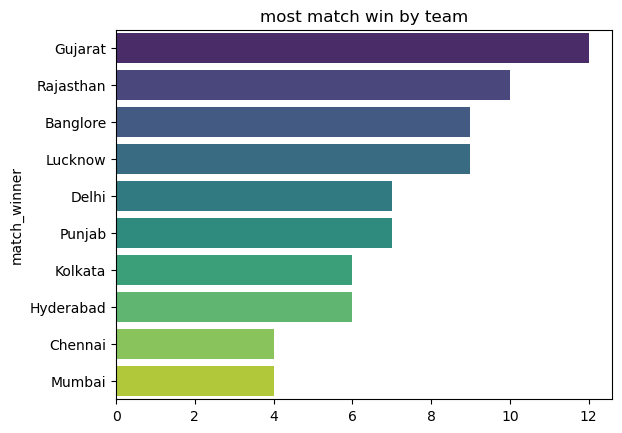

In [65]:
sns.barplot(y=match_wins.index, x=match_wins.values, palette='viridis')
plt.title("most match win by team")

#### 2.Toss Decision Trends

In [68]:
df['toss_decision'].value_counts()

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss Decision Trends')

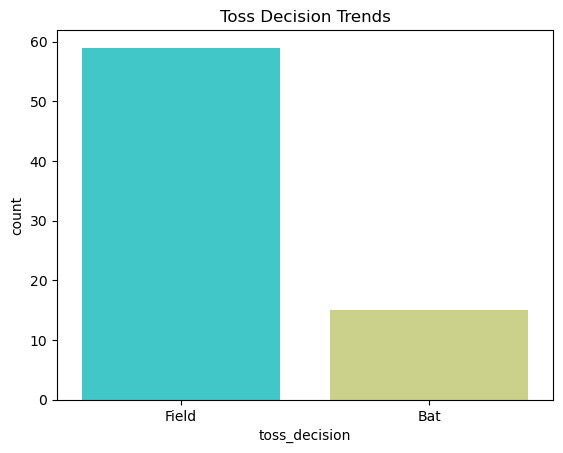

In [72]:
sns.countplot(x=df['toss_decision'], palette='rainbow')
plt.title('Toss Decision Trends')

#### 3. Toss Winner vs Match Winner

In [81]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()

In [83]:
count

36

In [85]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count *100)/df.shape[0]
percentage.round(2)

48.65

###  How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'won by')

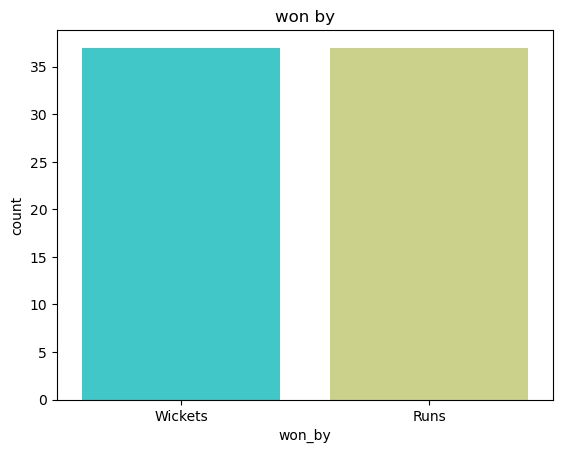

In [92]:
sns.countplot(x=df['won_by'], palette='rainbow')
plt.title('won by')

#### Key Player Performances
##### 1. Most "Player of the Match" Awards

In [101]:
count=df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Player of the match')

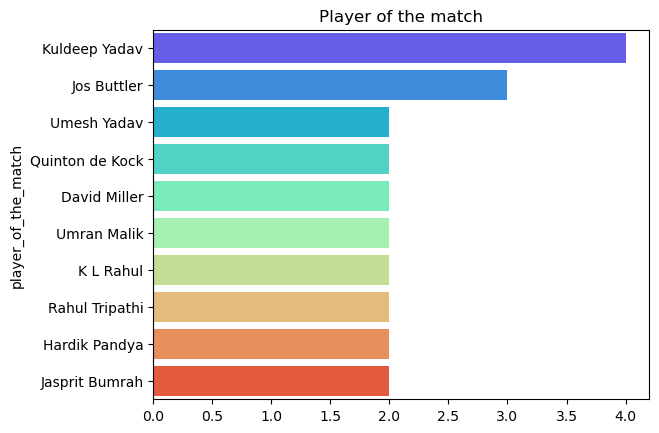

In [105]:
sns.barplot(x=count.values , y=count.index, palette='rainbow')
plt.title('Player of the match')

###### 2 Top Scorers

In [112]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)
high

top_scorer
Jos Buttler            651
Quinton de Kock        377
KL Rahul               351
Shubman Gill           288
Faf du Plessis         257
Liam Livingstone       239
David Warner           213
W. Saha                190
Ishan Kishan           180
Shikhar Dhawan         158
Hardik Pandya          154
Mitchell Marsh         152
Rahul Tripathi         147
Devon Conway           143
Virat Kohli            131
Abhishek Sharma        122
Andre Russell          119
Deepak Hooda           114
Rajat Patidar          112
Ruturaj Gaikwad         99
Shivam Dube             95
David Miller            94
Moeen Ali               93
MS Dhoni                86
Suryakumar Yadav        68
Yashasvi Jaiswal        68
Dinesh Karthik          66
Sai Sudharsan           65
Shimron Hetmyer         59
Aiden Markram           57
Kane Williamson         57
Nitish Rana             57
Riyan Parag             56
Pat Cummins             56
Sanju Samson            54
Tilak Varma             51
Sherfane Rutherfo

In [114]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

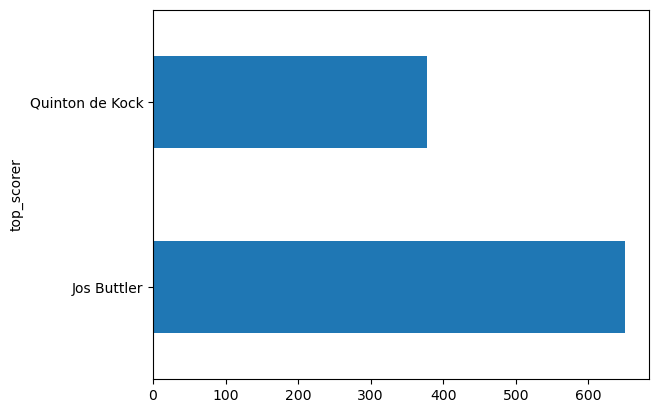

In [116]:
high.plot(kind = 'barh')

#### 10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

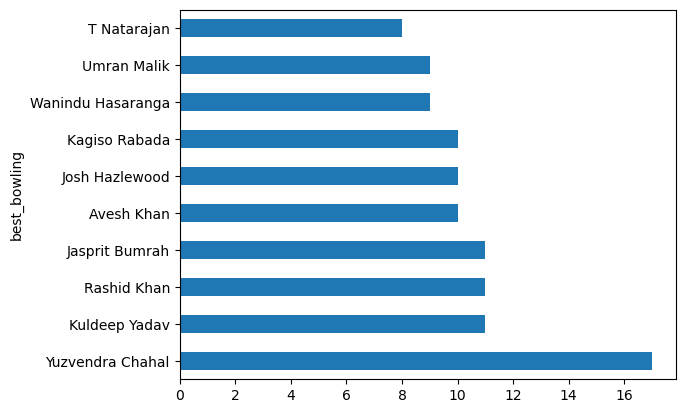

In [119]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind = 'barh')